<a href="https://colab.research.google.com/github/Swetha-Gopal/Grip_task1/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
url =  "http://bit.ly/w-data"
stud_data = pd.read_csv(url)
print("source data imported")
stud_data.head(5)

source data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [13]:
stud_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**plotting** **the** **data**


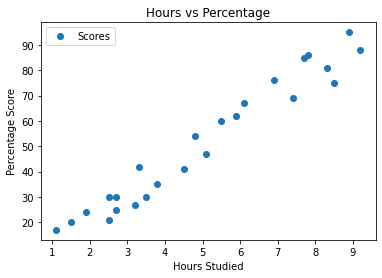

In [15]:
# Plotting the distribution of scores
stud_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

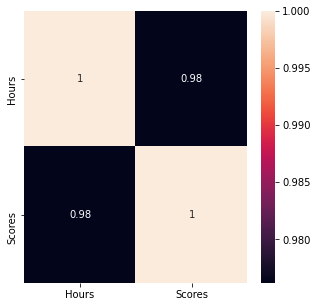

In [21]:
plt.figure(figsize=(5,5))
correlation_matrix = stud_data.corr()
sns.heatmap(data=correlation_matrix, annot=True)# annot = True to print the values inside the square
plt.show()


**PREPARNG THE DATA (dividing data into attributes and labels)**

In [23]:
X = stud_data.iloc[:, :-1].values  
y = stud_data.iloc[:, 1].values 

In [24]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**TRAINING** **THE** **DATA**

In [33]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete.")

Training complete.


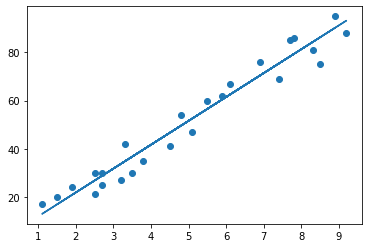

In [34]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Checking the accuracy for train_test split()

In [32]:
print("TEST SCORE")
print(regressor.score(X_test, y_test))
print("TRAINING SCORE")
print(regressor.score(X_train, y_train))

TEST SCORE
0.9454906892105354
TRAINING SCORE
0.9515510725211553


**MAKING PREDICTIONS**

In [37]:
y_pred = regressor.predict(X_test) # Predicting the scores
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [52]:
#You can also test with your own data
print('Score of student who studied for 9.25 hours a day', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a day [93.69173249]


**EVALUATING** **THE** **MODEL**

In [53]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
